In [1]:
from bs4 import BeautifulSoup
import requests
import io
import re
import pandas as pd
import matplotlib
%matplotlib inline

In [2]:
with io.open("message.html", "r", encoding="utf-8") as my_file:
     page = my_file.read() 

In [3]:
soup = BeautifulSoup(page, "html.parser")

In [4]:
texts = soup.findAll(text=True)

In [5]:
texts = texts[7:len(texts) - 1]

In [7]:
dates = {}
words_dict = {}
phrases = {}
my_phrases = {}
her_phrases = {}
my_words = {}
her_words = {}
her = True
me = False
her_name = ''
my_name = ''
r = re.compile('....\.(.|..)\.(.|..)\.')
for i in range(0, len(texts)):
    if len(texts[i].split()) >= 3:
        date = ''.join(texts[i].split()[j] for j in range(0,3))
    else:
        date = texts[i]
    if texts[i] == her_name:
        her = True
        me = False
    elif texts[i] == my_name:
        me = True
        her = False
    elif r.match(date) is not None:
        if date in dates:
            dates[date] = dates[date] + 1
        else:
            dates[date] = 1
    else:
        phrase = texts[i].lower()
        if phrase in phrases:
            phrases[phrase] = phrases[phrase] + 1
        else:
            phrases[phrase] = 1
        words = phrase.split()
        for word in words:
            if word in words_dict:
                words_dict[word] = words_dict[word] + 1
            else:
                words_dict[word] = 1
            if her:
                if word in her_words:
                    her_words[word] = her_words[word] + 1
                else:
                    her_words[word] = 1
            elif me:
                if word in my_words:
                    my_words[word] = my_words[word] + 1
                else:
                    my_words[word] = 1
        if her:
            if phrase in her_phrases:
                her_phrases[phrase] = her_phrases[phrase] + 1
            else:
                her_phrases[phrase] = 1
        elif me: 
            if phrase in my_phrases:
                my_phrases[phrase] = my_phrases[phrase] + 1
            else:
                my_phrases[phrase] = 1

,frequency
2015.8.9.,1253
2017.1.18.,1195
2015.8.30.,988
2015.8.25.,879
2015.8.29.,867
2017.1.17.,849
2015.8.22.,841
2015.7.14.,785
2015.9.1.,775
2015.9.3.,774


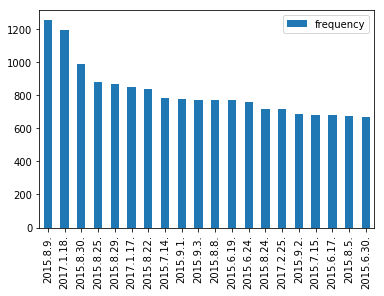

In [8]:
dates_df = pd.DataFrame.from_dict(dates, orient='index')
dates_df.columns = ["frequency"]
dates_df.sort_values(by="frequency", ascending=False).head(20).plot.bar()
mean_messages = dates_df["frequency"].sum()/dates_df.shape[0]
dates_df.sort_values(by="frequency", ascending=False).head(20)

,frequency
yeah,2006
lol,1528
hi,1101
nice,986
:(,834
no,650
okii,607
oh,527
yay,498
mmm,475


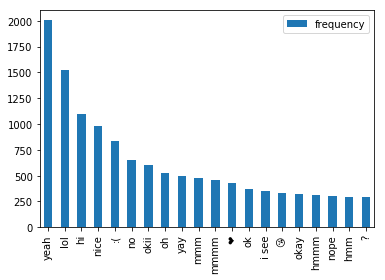

In [9]:
phrases_df = pd.DataFrame.from_dict(phrases, orient='index')
phrases_df.columns = ["frequency"]
phrases_df.sort_values(by="frequency", ascending=False).head(20).plot.bar()
total_count = phrases_df["frequency"].sum()
phrases_df.sort_values(by="frequency", ascending=False).head(20)

In [10]:
print("Mean messages: {}".format(mean_messages))

Mean messages: 117.79362267493357


,frequency
i,29491
you,18064
to,14822
the,12078
and,11607
a,9253
it,8899
like,8218
so,6901
is,5682


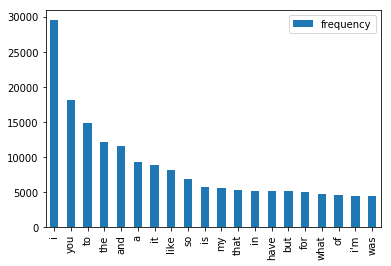

In [11]:
words_df = pd.DataFrame.from_dict(words_dict, orient='index')
words_df.columns = ["frequency"]
words_df.sort_values(by="frequency", ascending=False).head(20).plot.bar()
words_df.sort_values(by="frequency", ascending=False).head(20)


In [12]:
her_df = pd.DataFrame.from_dict(her_phrases, orient='index')
her_df.columns = ["frequency"]
her_count = her_df["frequency"].sum()
her_df.sort_values(by="frequency", ascending = False).head(20)

,frequency
yeah,884
hi,564
:(,499
okii,451
lol,432
no,331
nice,304
❤,282
bunny님이 회원님에게 전화했습니다.,281
hmm,265


In [13]:
my_df = pd.DataFrame.from_dict(my_phrases, orient='index')
my_df.columns = ["frequency"]
my_count = my_df["frequency"].sum()
my_df.sort_values(by="frequency", ascending = False).head(20)

,frequency
yeah,1122
lol,1096
nice,682
hi,537
mmmm,451
mmm,394
i see,342
:(,335
okay,322
no,319


In [14]:
my_words_df = pd.DataFrame.from_dict(my_words, orient='index')
my_words_df.columns = ["frequency"]
my_words_df.sort_values(by="frequency", ascending = False).head(20)

,frequency
i,12138
you,7586
to,5534
the,4354
like,4123
and,3718
it,3684
a,3170
its,2557
yeah,2402


In [15]:
her_words_df = pd.DataFrame.from_dict(her_words, orient='index')
her_words_df.columns = ["frequency"]
her_words_df.sort_values(by="frequency", ascending = False).head(20)

,frequency
i,17353
you,10478
to,9288
and,7889
the,7724
a,6083
it,5215
so,4613
like,4095
i'm,4065


In [16]:
print("My messages: {}".format(my_count))
print("Her messages: {}".format(her_count))
print("Total messages: {}".format(total_count))

My messages: 59274
Her messages: 70858
Total messages: 130132
